In [187]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy as scp
import pandas as pd

NUMBER_OF_RACE_TUBES = 18

# Load SPE image
multiimage = ski.io.MultiImage('20240723_CCD1.SPE')

# Convert to 3D array 
frames = multiimage.concatenate()[0]

#Converting 3D array to numpy array
number_of_frames = frames.shape[0]
# Get sum of column values for every row and every frame. 
# We will call these "row_sums" since we want each row to have one sum.
# 0. Starting with 3D array (143, 1024, 1024) ~ (frame, row, column).
# 1. Sum 3D array by axis 2 (sum columns) ==> (143, 1024) 2D array of 1024 row_sums for 143 frames.
#       For each row in each frame, summed every column value.
# 2. Sum 2D array by axis 0 (sum frames) ==> (1024, ) 1D array of 1024 row_sums.
#       For each row, summed every frame's row_sum. Now we have one sum for each row.

row_sums = frames.sum(axis=2).sum(axis=0) # (1024, )
row_sums = row_sums/max(row_sums)

# Find peaks and troughs of luminescence
# Basically, we're looking down the rows, trying to find rows with
#   high overall luminesence and low overall luminesence.
#   We use these to identify tube boundaries.
peaks, peak_properties = signal.find_peaks(row_sums, distance = 30)
troughs, trough_properties = signal.find_peaks(row_sums*(-1), distance = 30)
print(troughs)



[   3   78  119  154  184  237  269  351  415  445  478  511  554  599
  656  697  730  782  817  860  903  935  971 1001]


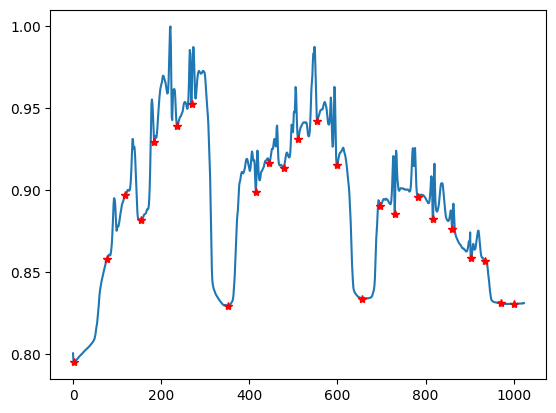

In [147]:
#plot row_sums and troughs to visually check where the boundaries are
plt.plot(row_sums)
plt.plot(troughs, row_sums[troughs], "r*")
plt.show()
#plt.plot(peaks, row_sums[peaks], "g*")

You need to actually identify the trough that corresponds to the beginning of the first tube. It is also possible to run the plotting program and later figuring out which of the plots corresponds to luminescence data, but I would still suggest identifying the first tube through coordinate. We will use this coordinate below. 
Starting trough will be the first tube trough. You can see that trough number 2 (in python indices start with 0, therefore, in code the index would be 1) is where the luminescence starts. Therefore, we pick trough number 2. 

Also, if the race tubes are not closely packed together and there are gaps between 6-packs, the script will treat the space between the 6-packs as a race tube. Therefore, it is important to double check the troughs and graphs with WinView image of the luminescence file to see that the coordinates are being calculated correctly. For example, in the above plot there is a space between two troughs that is not a race tube. Detailed explanation would be in the ReadMe document.  


In the following block of code, I make a distinction between automatically detected race tube boundaries and manually entered race tube boundaries. 
If you plan on manually entering the boundaries using the winview software - write "True" in the "using_manually_entered_boundaries_from_winvew variable". 
Using manually entered boundaries would be more precise, albeit a little more time consuming. It will require less time than the excel software. 

In [ ]:
starting_trough_index = 1 #
LEFT_BOUND = 50
RIGHT_BOUND = 600
BACKGROUND_TOP = 0
BACKGROUND_BOTTOM = 45

BOUNDARIES_FROM_WINVIEW = []
LEFT_BOUNDARIES_FROM_WINVIEW = []
RIGHT_BOUNDARIES_FROM_WINVIEW = []
using_manually_entered_boundaries_from_winview = False 

luminescence_array = []
for i in range(NUMBER_OF_RACE_TUBES):
    race_tube_lum_sum = []
    top_bound = troughs[starting_trough_index + i]
    bottom_bound = troughs[starting_trough_index + i + 1]

    for j in range(number_of_frames):
        #background = frames[j,BACKGROUND_TOP:BACKGROUND_BOTTOM, LEFT_BOUND:RIGHT_BOUND].sum()
        if using_manually_entered_boundaries_from_winview:
            sum = frames[j, BOUNDARIES_FROM_WINVIEW[i]:BOUNDARIES_FROM_WINVIEW[i+1], LEFT_BOUNDARIES_FROM_WINVIEW[i]:RIGHT_BOUNDARIES_FROM_WINVIEW[i]]
        else:
            sum = frames[j, top_bound:bottom_bound, LEFT_BOUND:RIGHT_BOUND].sum().sum()
        

        race_tube_lum_sum.append(sum)
    luminescence_array.append(race_tube_lum_sum)




The code blocks below will plot the luminescence data. First blocks will plot raw luminescence. It will also output all luminescence files in csv format if you choose to. 
Second group of blocks will plot the detrended data. It will output luminescence files in csv format as well, provided that you choose so. 
Write "True" in the "csv_output" to get csv files 

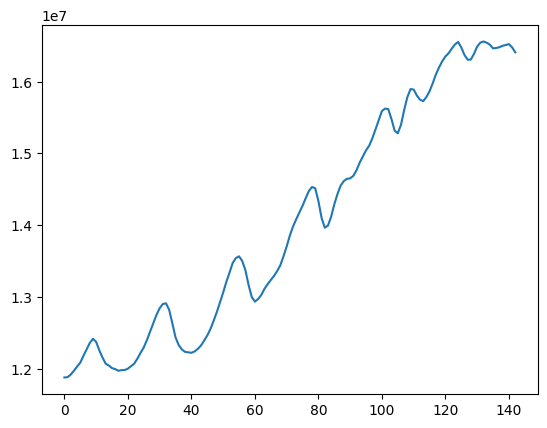

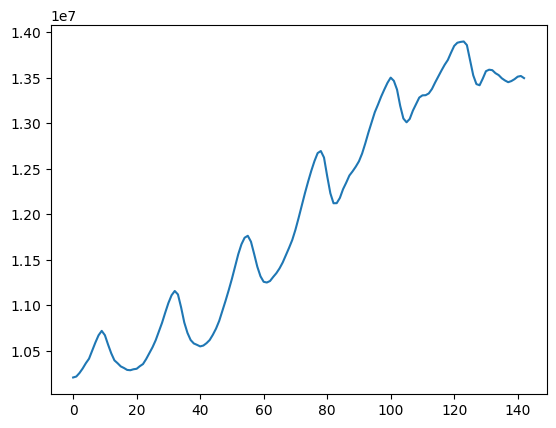

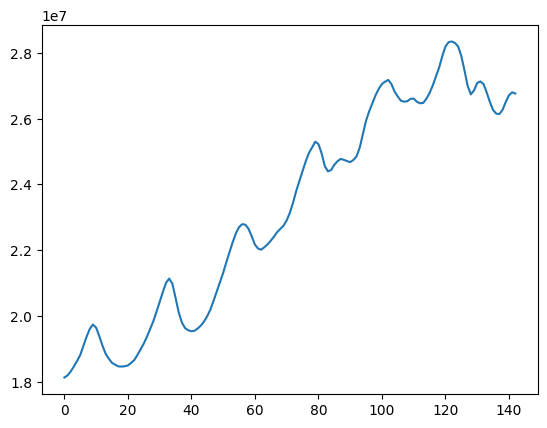

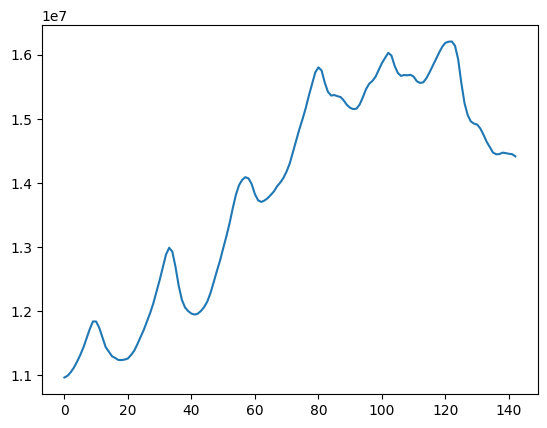

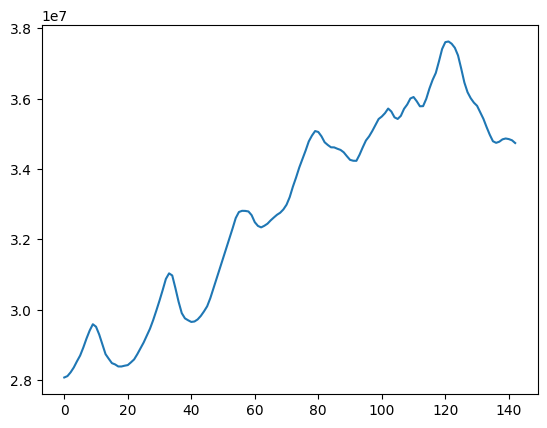

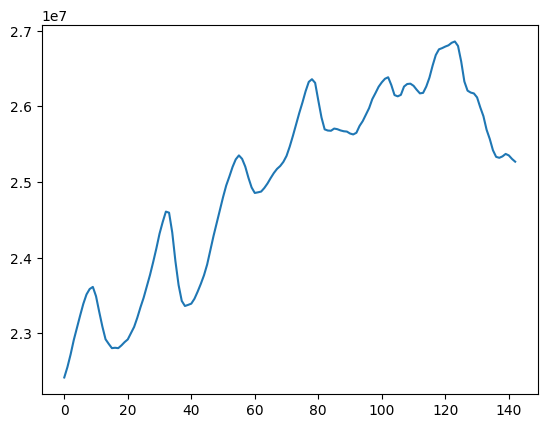

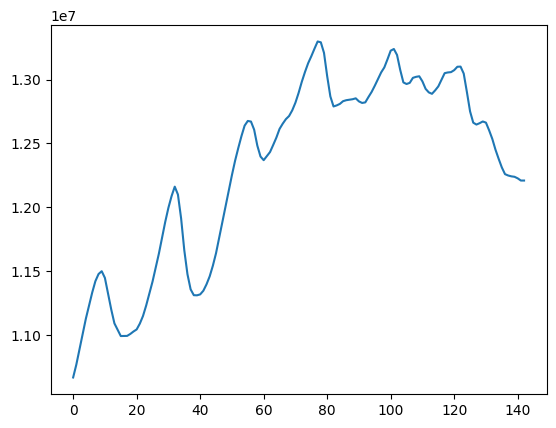

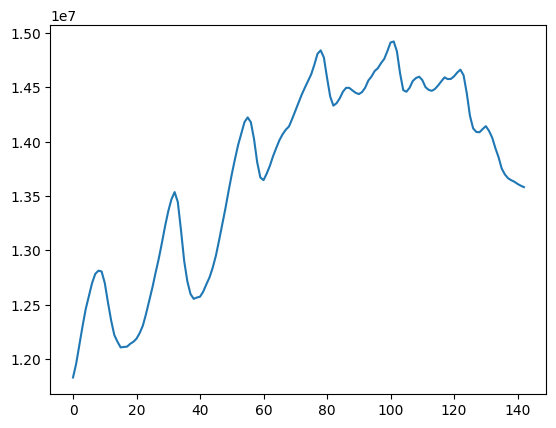

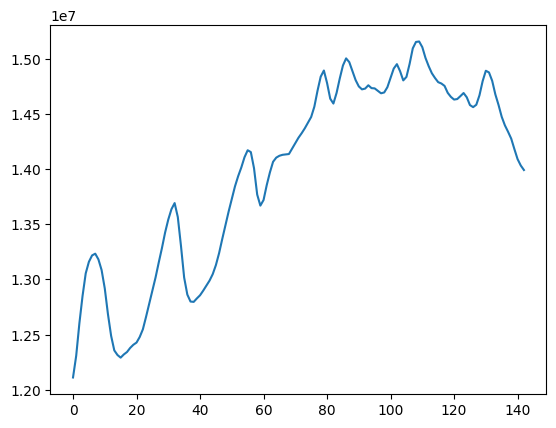

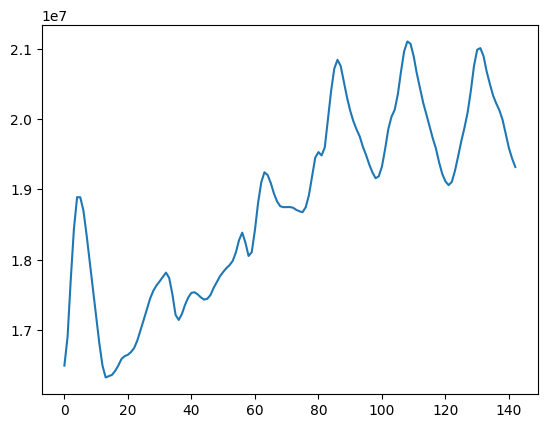

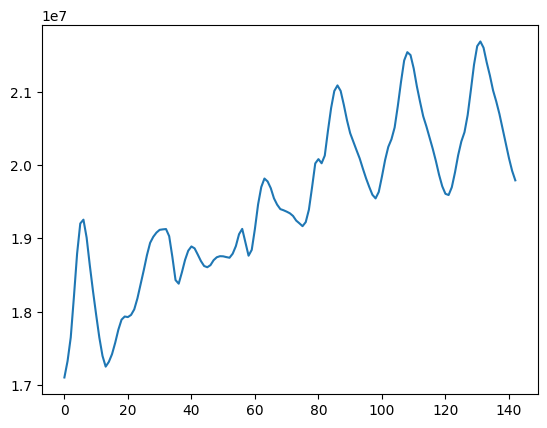

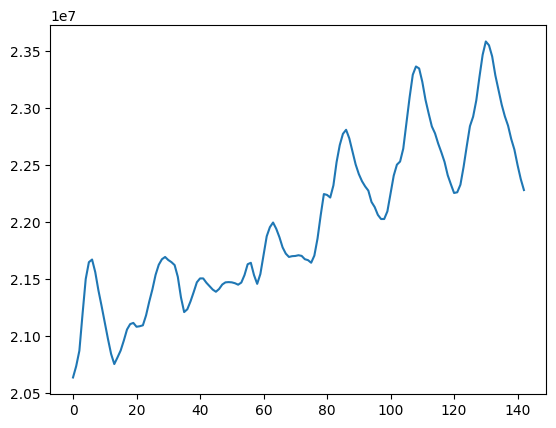

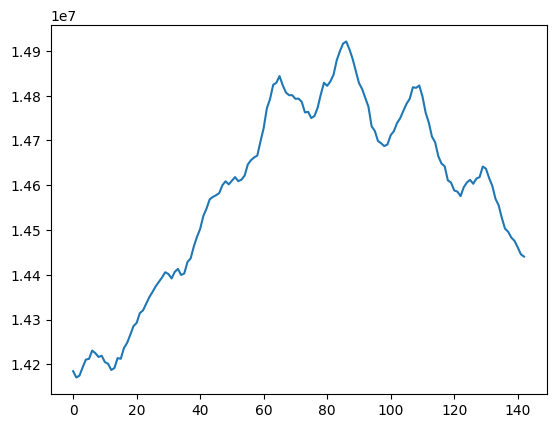

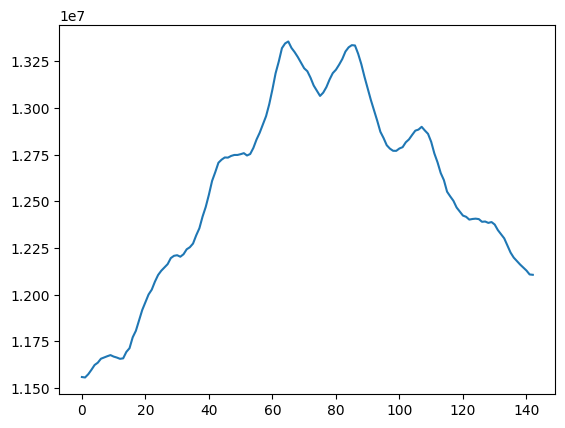

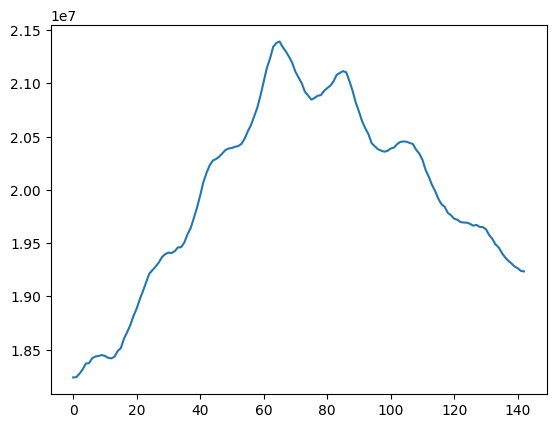

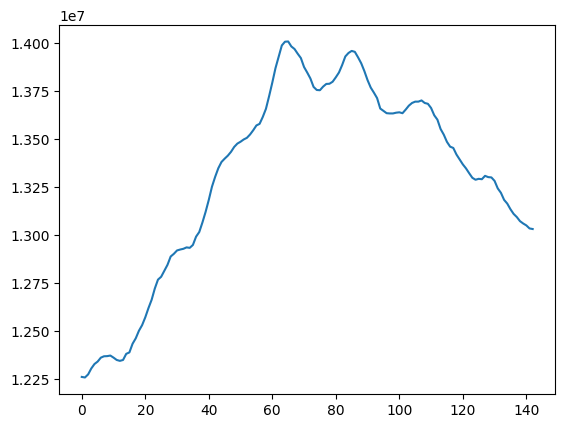

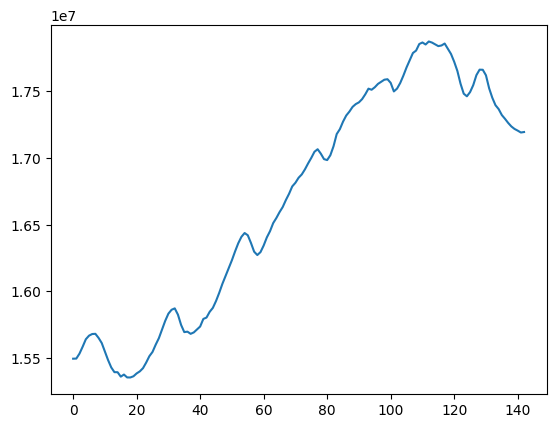

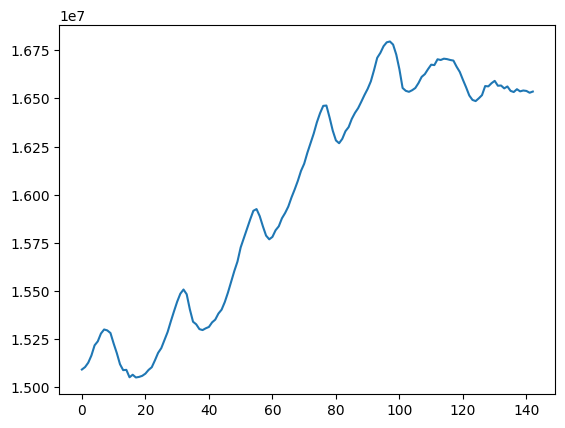

In [199]:
import numpy as np
import matplotlib.pyplot as plt

for array in luminescence_array:
    #print(i+1)
    x = np.arange(len(array))
    y = array
    y = y
#plot to show raw luminescence
    plt.plot(x, y)
    plt.show()

 #code to output the luminescence data as csv files
get_csv_output = True
i = 0
if get_csv_output:
    for array in luminescence_array:
        array_for_csv = pd.DataFrame(array)
        array_for_csv.to_csv("%iraw.csv"%i, index = False)
        i = i + 1

   

Note that when detrending, you can choose polynomial degree for detrending. 
For example, here, the function "polyfit" takes in three arguments - x, y, and 3. The third argument - number 3 - is the polynomial order. You can choose other numbers and see how the polynomial trend curve changes. 
For any code that you don't want to run, for example the plot or print codes, you can put a "#" at the beginning of the line so that line does not run. 
Select which particular plots you want by putting "True" or "False" in the variables "plot_raw", "plot_raw_with_trend", and "plot_detrended"
Write "True" in "get_detrended_csvs" variable to get detrended csvs

5
1
DETRENDED LUMINESCENCE


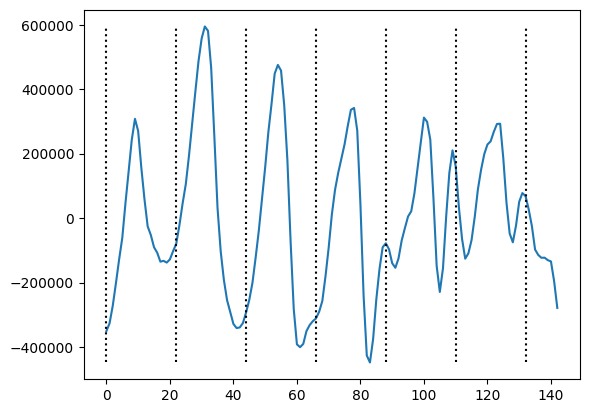

2
DETRENDED LUMINESCENCE


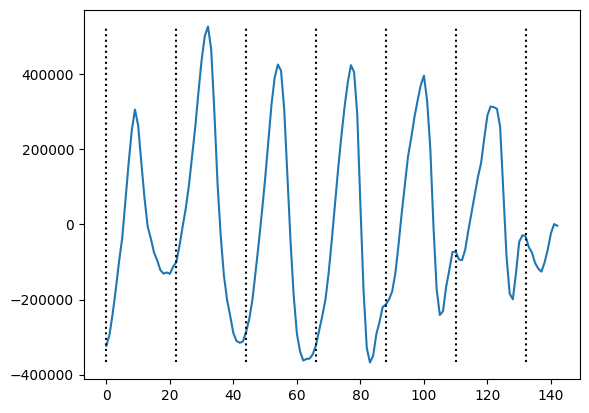

3
DETRENDED LUMINESCENCE


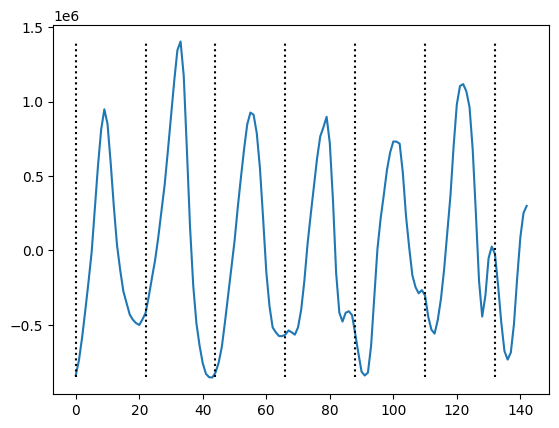

4
DETRENDED LUMINESCENCE


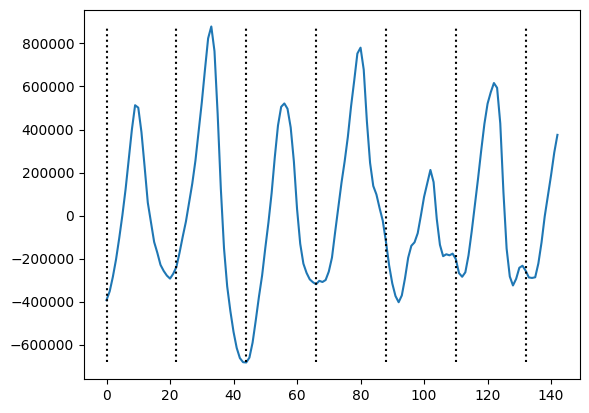

5
DETRENDED LUMINESCENCE


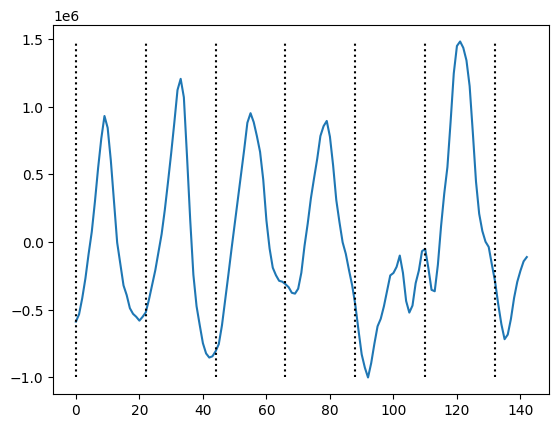

6
DETRENDED LUMINESCENCE


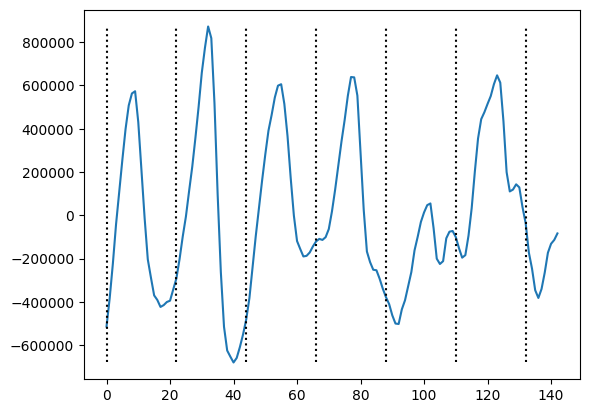

7
DETRENDED LUMINESCENCE


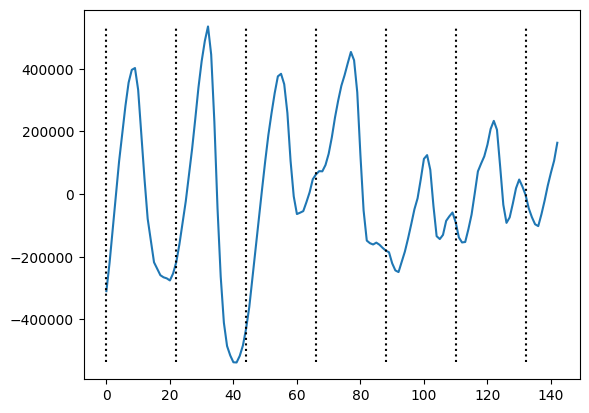

8
DETRENDED LUMINESCENCE


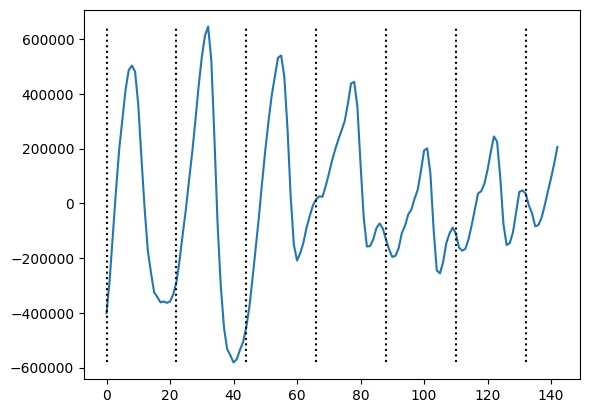

9
DETRENDED LUMINESCENCE


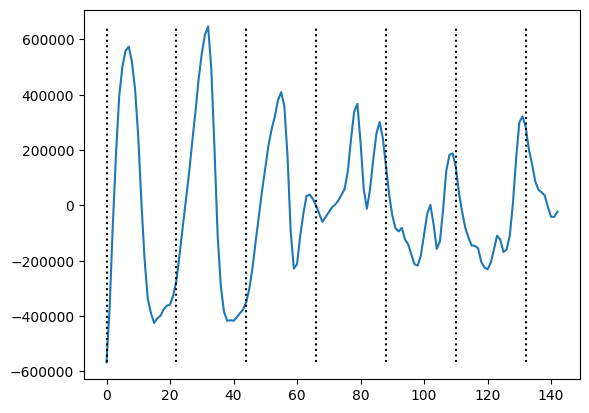

10
DETRENDED LUMINESCENCE


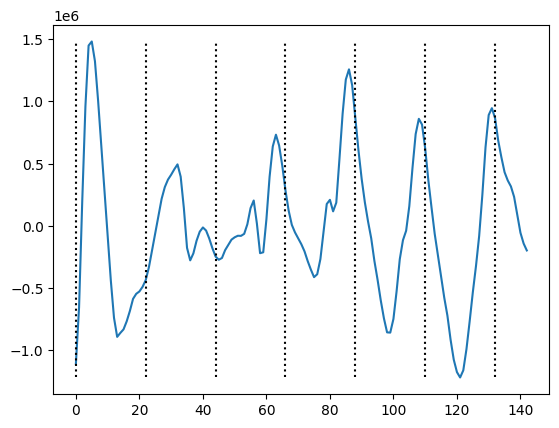

11
DETRENDED LUMINESCENCE


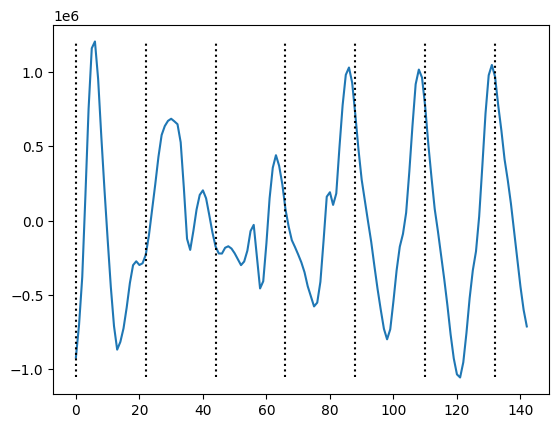

12
DETRENDED LUMINESCENCE


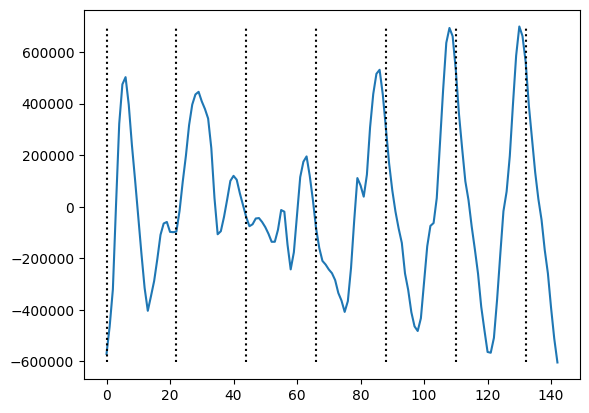

13
DETRENDED LUMINESCENCE


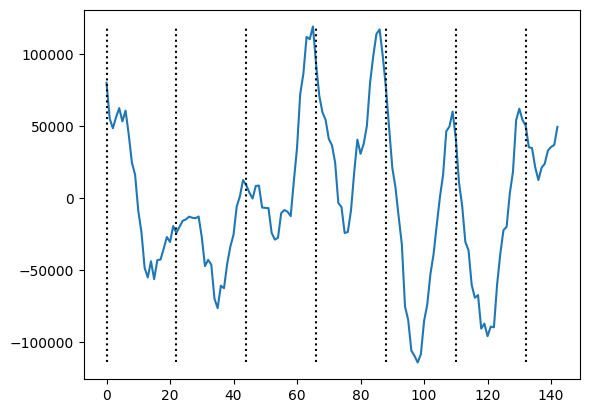

14
DETRENDED LUMINESCENCE


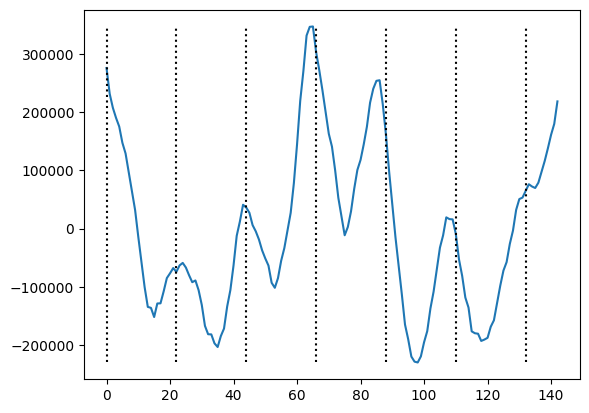

15
DETRENDED LUMINESCENCE


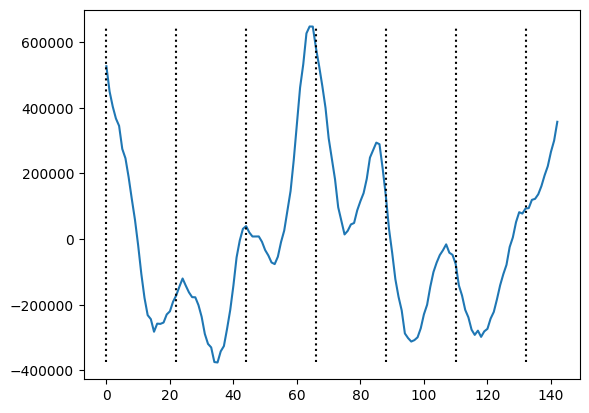

16
DETRENDED LUMINESCENCE


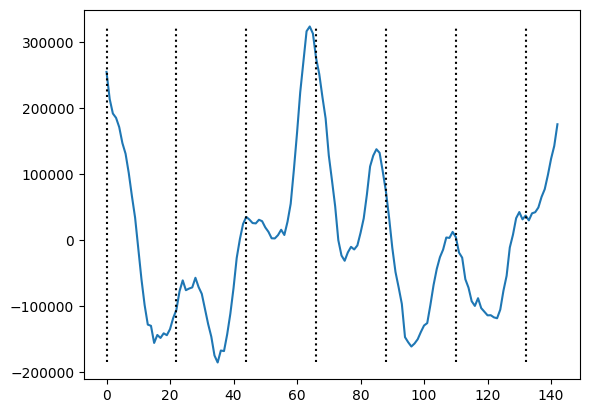

17
DETRENDED LUMINESCENCE


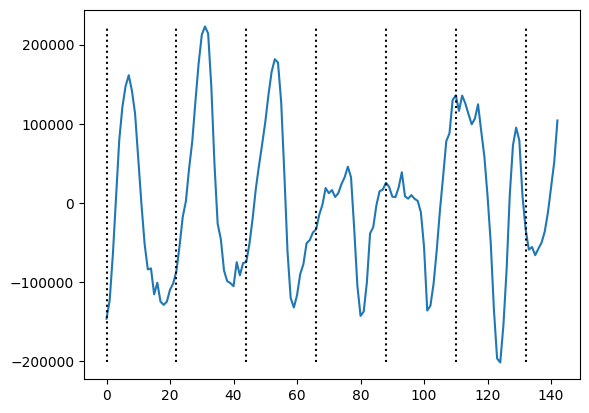

18
DETRENDED LUMINESCENCE


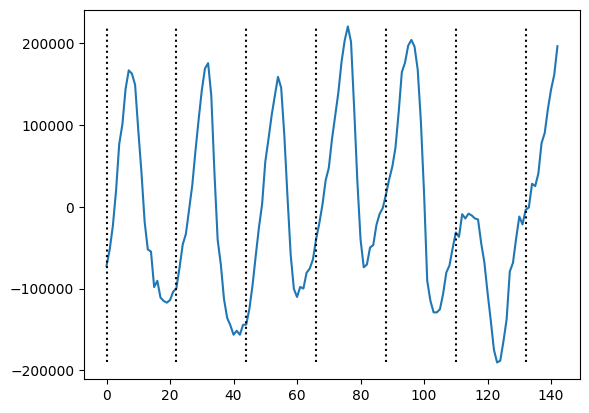

In [ ]:
vertical_lines_coordinates = []
hours = number_of_frames
days = hours//24

#select "False" or "True" to choose not to plot specific plots or to plot these specific plots respectively
plot_raw = False
plot_raw_with_trend = False
plot_detrended = True

for i in range(days + 2):
    vertical_lines_coordinates.append(i*22)
array_of_detrended_data = []
for i in range(len(luminescence_array)):
    x = np.arange(len(luminescence_array[i]))
    y = luminescence_array[i]
    y = y
#plot to show raw luminescence
    if plot_raw:
        print(i+1)
        plt.plot(x, y)
        print("RAW LUMINESCENCE")
        plt.show()

#linear regression to find the trend
    model = np.polyfit(x, y, 3)
    predicted = np.polyval(model, x)
    

#plot to show the trend
    if plot_raw_with_trend:
        print(i+1)
        plt.plot(x, y)
        plt.plot(x, predicted, 'k-')
        print("RAW LUMINESCENCE WITH TREND")
        plt.show()
#plot to show the detrended luminescence signal
    if plot_detrended:
        print(i+1)
        plt.plot(x, y - predicted)
        print("DETRENDED LUMINESCENCE")
        plt.vlines(x = vertical_lines_coordinates, ymin = min(y - predicted), ymax = max(y - predicted), colors = 'black', linestyles='dotted')
        plt.show()
    
    array_of_detrended_data.append(y - predicted)


get_detrended_csvs = False
#code to output the luminescence data as csv files
i = 0
if get_detrended_csvs:
    for array in array_of_detrended_data:
        array_for_csv = pd.DataFrame(array)
        array_for_csv.to_csv("%idetrended.csv"%i, index = False)
        i = i + 1
